In [1]:
%load_ext autoreload
%autoreload 2
import random
from cap.dehaze import dehaze as cap_dehaze
from dcp.dehaze import dehaze as dcp_dehaze
from config import config
import os
from glob import glob
from matplotlib import pyplot as plt
import cv2
from sklearn.metrics import mean_squared_error as compute_mse
from skimage.metrics import peak_signal_noise_ratio as compute_psnr
from skimage.metrics import structural_similarity as compute_ssim
from tqdm import tqdm
import timeit
import numpy as np

In [2]:
_RESIDE_PATH = 'D:\\data\\reside\\indoor_train'
_RESULT_PATH = '../result'
_VIDEO_PATH = 'D:\\data\\dehaze'

In [3]:
hazy_fold_path = os.path.join(_RESIDE_PATH,'hazy')
clear_fold_path = os.path.join(_RESIDE_PATH,'clear')

In [4]:
def get_clear(hazy_img_path, clear_fold_path):
    hazy_img_path = hazy_img_path.replace('\\', '/')
    clear_file = hazy_img_path.split('/')[-1].split('_')[0] + '.png'
    clear_img_path = os.path.join(clear_fold_path, clear_file)
    return clear_img_path

In [5]:
def frame_dehaze(hazy, method):
    start = timeit.default_timer()
    if method == 'dcp':
        dehaze_img = dcp_dehaze(hazy, config['dcp'])
    else:
        dehaze_img = cap_dehaze(hazy, config['cap'])
    
    end = timeit.default_timer()
    time = end - start
    return dehaze_img, time

In [13]:
video_name = 'traffic.mp4'
vid_size = (600, 334)
vid_fps = 30
cap = cv2.VideoCapture(os.path.join(_VIDEO_PATH,video_name))

method = 'dcp'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out_name = video_name.split('.')[0]
out = cv2.VideoWriter(os.path.join(_VIDEO_PATH, out_name + f'_{method}.avi'),fourcc, vid_fps, vid_size)
list_time = []
while(cap.isOpened()):
    ret, hazy_frame = cap.read()
    try:
        if (cv2.waitKey(1)) & (0xFF == ord('q')) & (hazy_frame is None):
            break
        else:
            dehaze_frame, time = frame_dehaze(hazy_frame, method = method)
            list_time.append(time)
            out.write(dehaze_frame)
    except Exception as e:
        print('Break')
        break
            
out.release()

Break


In [14]:
np.mean(list_time)

0.07305834922679837

### Investigate after creating video

In [30]:
video_name = 'traffic.mp4'
vid_size = (600, 334)
vid_fps = 30
cap = cv2.VideoCapture(os.path.join(_VIDEO_PATH,video_name))

method = 'dcp'
out_name = video_name.split('.')[0]
out = cv2.VideoCapture(os.path.join(_VIDEO_PATH, out_name + f'_{method}.avi'))

list_time = []
while(cap.isOpened()):
    _, hazy_frame = cap.read()
    _, dehazy_frame = out.read()
    break

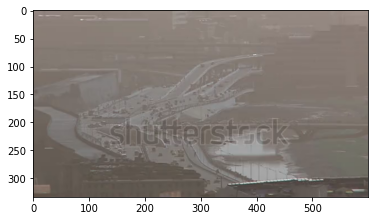

In [51]:
hazy_frame = cv2.cvtColor(hazy_frame, cv2.COLOR_BGR2RGB)
cv2.imwrite(f'../result/{out_name}_hazy_frame.png', hazy_frame)
plt.imshow(hazy_frame)

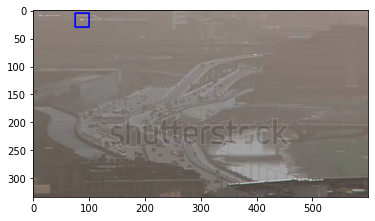

In [54]:
color = (0, 0, 255)
hazy_frame_maker = cv2.rectangle(hazy_frame.copy(), (75, 5), (100,30), color, 2)
cv2.imwrite(f'../result/{out_name}_hazy_frame_maker.png', hazy_frame_maker)
plt.imshow(hazy_frame_maker)

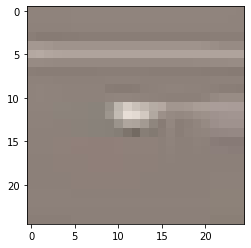

In [61]:
cv2.imwrite(f'../result/{out_name}_hazy_maker.png', hazy_frame[5:30,75:100])
plt.imshow(hazy_frame[5:30,75:100])

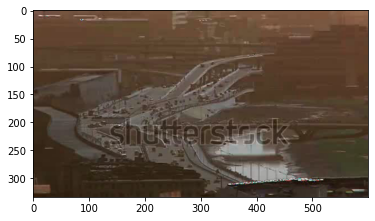

In [56]:
dehazy_frame = cv2.cvtColor(dehazy_frame, cv2.COLOR_BGR2RGB)
cv2.imwrite(f'../result/{out_name}_dehazy_frame.png', dehazy_frame)
plt.imshow(dehazy_frame)

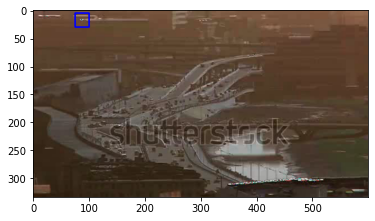

In [57]:
color = (0, 0, 255)
dehazy_frame_maker = cv2.rectangle(dehazy_frame.copy(), (75, 5), (100,30), color, 2)
cv2.imwrite(f'../result/{out_name}_dehazy_frame_maker.png', dehazy_frame_maker)
plt.imshow(dehazy_frame_maker)

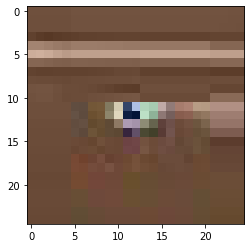

In [59]:
cv2.imwrite(f'../result/{out_name}_dehazy_maker.png', dehazy_frame[5:30,75:100])
plt.imshow(dehazy_frame[5:30,75:100])